In [1]:
import pandas as pd
import wikipedia as wp
import numpy as np

In [2]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_white'
import plotly.graph_objects as go

In [3]:
html = wp.page('List of Doctor Who episodes (2005–present)').html().encode('cp1252')

In [4]:
tables = pd.read_html(html)

In [5]:
table_num_doctor = pd.DataFrame([[3, str(9)]] + 
                                [[i, str(10)] for i in range(4, 8)] + 
                                [[i, str(11)] for i in range(8, 12)] + 
                                [[i, str(12)] for i in range(12, 15)] + 
                                [[i, str(13)] for i in range(15, 17)], columns=['table_num', 'Doctor'])

## Нужны таблицы начиная с 3 по 15

In [6]:
for i in range(3, 17):
    tables[i]['table_num'] = i
    tables[i] = tables[i].merge(table_num_doctor, on=['table_num'])

In [7]:
df_all_episodes_raw = pd.concat([
    tables[i][['Story', 'Episode', 'Title', 'Directed by', 
               'Written by','Original air date', 'UK viewers(millions) [8]', 
               'AI [8]', 'Doctor']] for i in range(3, 16)])

In [8]:
df_all_episodes_raw = pd.concat([df_all_episodes_raw, 
           tables[16].rename(
               columns={'No.story': 'Story', 'No. inseries': 'Episode'})[['Story', 'Episode', 'Title', 'Directed by', 
               'Written by','Original air date', 'UK viewers(millions) [8]', 
               'AI [8]', 'Doctor']]], sort=True)

In [9]:
df_all_episodes_raw.rename(columns={'UK viewers(millions) [8]': 'UK viewers(millions)', 'AI [8]': 'AI'}, inplace=True)

In [10]:
df_all_episodes_raw.reset_index(inplace=True)

In [11]:
df_all_episodes_raw['Story'] = df_all_episodes_raw['Story'].astype(str)

In [12]:
df_clean = df_all_episodes_raw[df_all_episodes_raw['Story'].str.startswith(
    tuple(str(i) for i in range(10))).fillna(True)][[
    'Story', 'Episode', 'Title', 'Directed by', 'Written by',
       'Original air date', 'UK viewers(millions)', 'AI', 'Doctor']]

In [13]:
df_clean = df_clean[df_clean['AI'] != 'TBD'].copy()

In [14]:
for column in ('UK viewers(millions)', 'AI'):
    df_clean[column] = df_clean[column].astype(float)

## Можно попробовать разделить чуваков с & на разных

In [15]:
df_clean.rename(columns={'AI': 'Appreciation Index'}, inplace=True)

In [17]:
# px.scatter(df_clean, x='Original air date', y='Appreciation Index', color='Doctor')

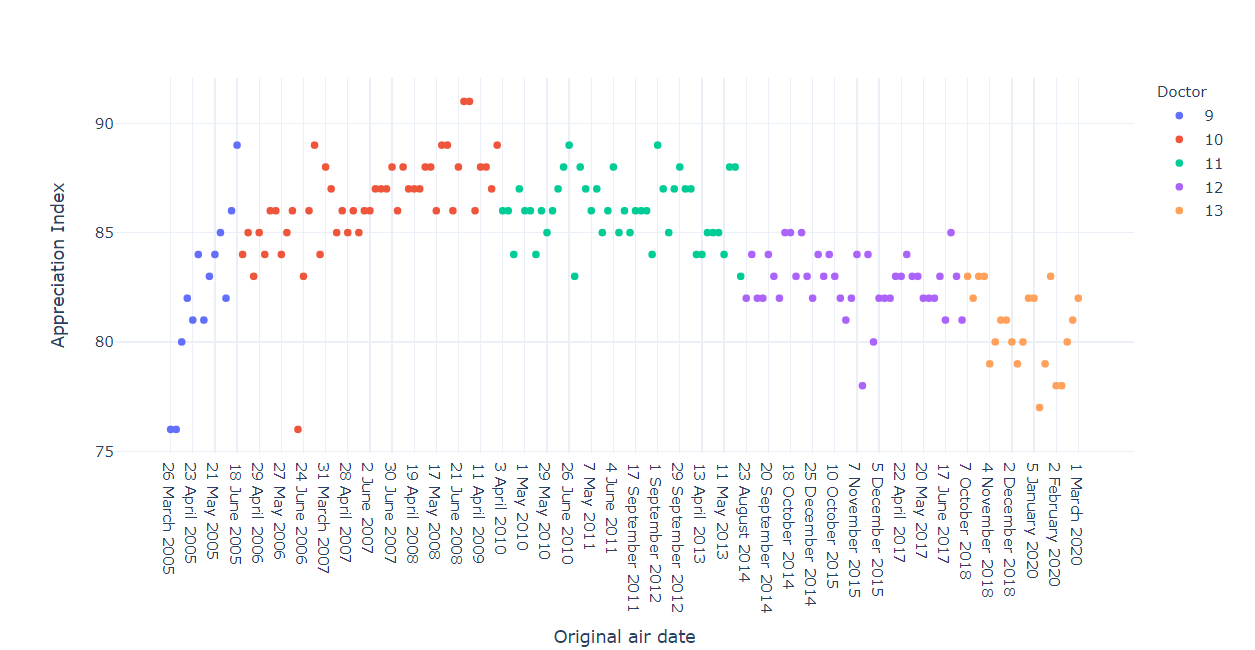